In [ ]:
## Install Tensorflow
%pip install tensorflow
%pip install matplotlib

In [ ]:
# Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [3]:
# Data Paths
train_data_dir = '../data/pepsico_dataset/Train/'
test_data_dir = '../data/pepsico_dataset/Test/'

In [4]:
batch_size = 32 # Set batch size
image_size = (250, 250)  # Set image size for processing

In [5]:
# Preprocessing images by rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [21]:
# Creating train/test generators for binary classification
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
)

Found 769 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [7]:
# Neural network architecture for the sequential model
model = Sequential() # Create sequential model
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu')) # CNN Input layer // 32 filters
model.add(MaxPooling2D((2, 2))) # Downsizing sample
model.add(Conv2D(64, (3, 3), activation='relu')) # 64 Filters
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) # 128 Filters
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # Converting from 2D to 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # CNN Output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Model compilation

In [22]:
# Training the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs = 5,  
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/5
25/25 [==============================] - 49s 2s/step - loss: 0.0295 - accuracy: 0.9896 - val_loss: 0.0223 - val_accuracy: 0.9948
Epoch 2/5
25/25 [==============================] - 48s 2s/step - loss: 0.0132 - accuracy: 0.9948 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/5
25/25 [==============================] - 47s 2s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0403 - val_accuracy: 0.9740
Epoch 4/5
25/25 [==============================] - 47s 2s/step - loss: 0.0278 - accuracy: 0.9948 - val_loss: 0.1167 - val_accuracy: 0.9688
Epoch 5/5
25/25 [==============================] - 47s 2s/step - loss: 0.0623 - accuracy: 0.9818 - val_loss: 0.0482 - val_accuracy: 0.9844


In [13]:
# Results
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy}")

6/6 [==============================] - 8s 1s/step - loss: 0.0162 - accuracy: 1.0000
Test Accuracy: 1.0


In [23]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


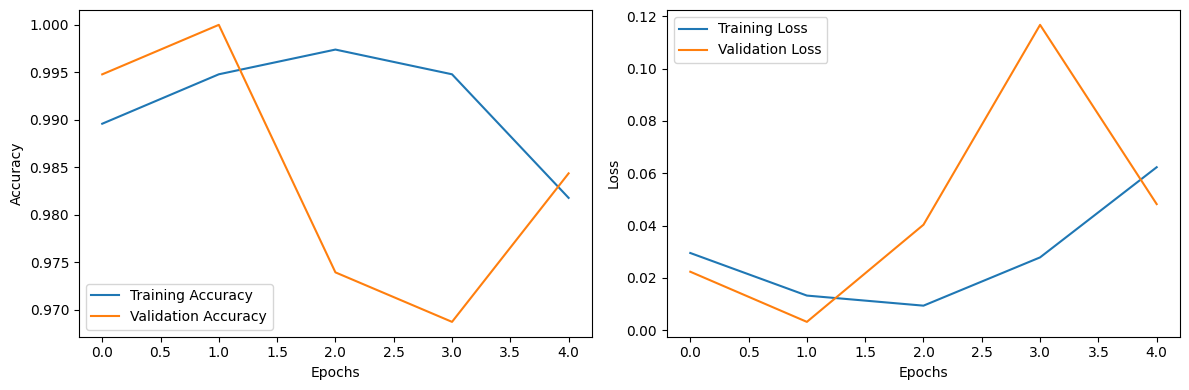

In [24]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
